We use the adam optimizer from Tensorflow

In [ ]:
#Keras ML projection, base template
import numpy as np
import pandas as pd
import re  # Import the regular expression library
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your CSV data
data = pd.read_csv(r'F:\inputs\stocks\ARGT_5YR.csv')
# Ensure your dataset has columns named 'Date' and 'Price'

# Extract the price column as a numpy array and remove non-numeric characters
prices = data['Close/Last'].values.astype(float) #.apply(lambda x: float(re.sub('[^0-9.]', '', x)))

# Normalize the price data
scaler = MinMaxScaler()
prices = scaler.fit_transform(prices.reshape(-1, 1))

# Define a function to prepare the data for LSTM training
def prepare_data(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

# Set the number of previous days to look back
look_back = 7  # You can adjust this value

# Prepare the data
X, Y = prepare_data(prices, look_back)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Create and compile the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
predicted = model.predict(X_test)

# Inverse transform the predictions to get actual price values
predicted = scaler.inverse_transform(predicted)
Y_test = scaler.inverse_transform(Y_test)

# Calculate RMSE (Root Mean Squared Error) to evaluate the model
rmse = sqrt(mean_squared_error(Y_test, predicted))
print("Root Mean Squared Error:", rmse)

# Visualize the predictions vs. actual prices
plt.figure(figsize=(12, 6))
plt.plot(Y_test, label="Actual Prices")
plt.plot(predicted, label="Predicted Prices")
plt.legend()
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.title("Stock Price Prediction")
plt.show()

# Now you can use the trained model to make 1 to 2 week projections by providing
# a sequence of historical prices as input to the model.


Shape of 'prices': (1258,)
8/8 [==============================] - 0s 2ms/step
Root Mean Squared Error: 5.9010040652180304
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step
Length of quarters: 246
Length of combined_prices: 23
Quarters: ['2022-12-21T00:00:00.000000000' '2022-12-22T00:00:00.000000000'
 '2022-12-23T00:00:00.000000000' '2022-12-27T00:00:00.000000000'
 '2022-12-28T00:00:00.000000000' '2022-12-29T00:00:00.000000000'
 '2022-12-30T00:00:00.000000000' '2023-01-03T00:00:00.000000000'
 '2023-01-04T00:00:00.000000000' '2023-01-05T00:00:00.000000000']
Combined Prices: [[38.6 ]
 [38.44]
 [38.63]
 [38.31]
 [37.58]
 [37.47]
 [37.36]
 [37.19]
 [37.49]
 [35.19]]
Length of x_positions: 23
Length of combined_prices: 23
Data type of x_positions: <class 'list'>
Data type of combined_prices: <class 'numpy.ndarray'>
Projection X Labels: ['Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019', 'Q4-2019', 'Q1-2020', 'Q2-2020', 'Q3-2020', 'Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021', 'Q4-2021', 'Q1-2022', 'Q2-2022', 'Q3-2022', 'Q4-2022', 'Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023', 'Q1-2024', 'Q2-2024']
Projection X Positions: 

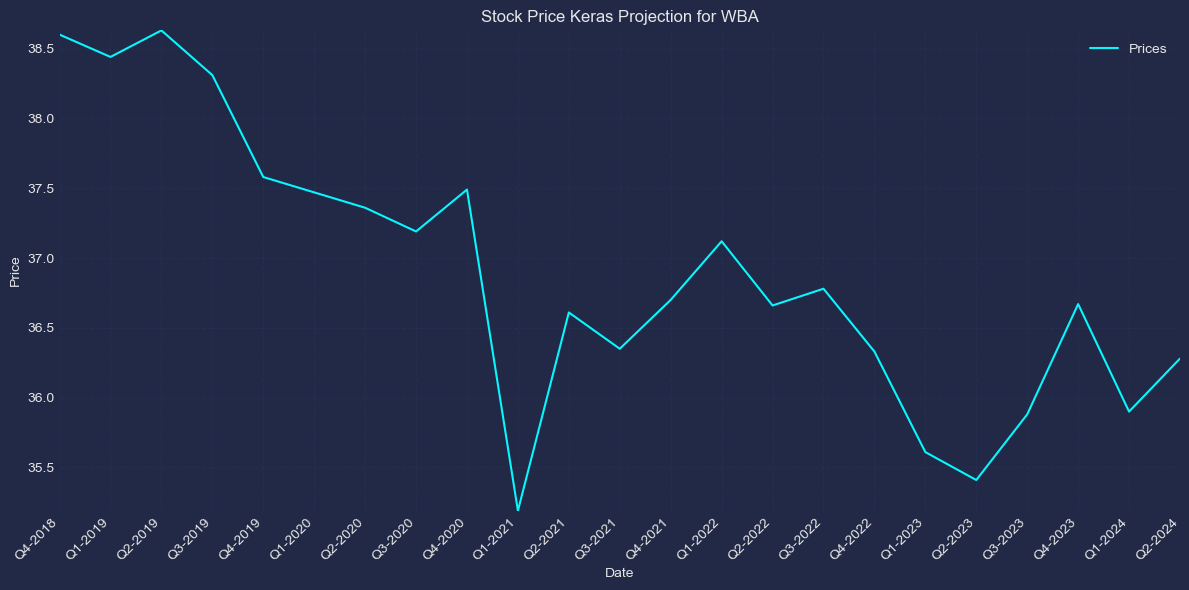

In [15]:
#main working cell
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
import mplcyberpunk

plt.style.use("cyberpunk")

ticker = "WBA"

# Use an f-string to insert the value of 'ticker' into the file path
csv_path = f'F:\\inputs\\stocks\\{ticker}.csv'  # Note the 'f' before the string

# Load your CSV data
data = pd.read_csv(csv_path)

# Ensure your dataset has columns named 'Date' and 'Price'
# Convert the 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')  # Adjust the format as needed

# Extract the price column as a numpy array and remove non-numeric characters
prices = data['Close/Last'].values.astype(float)
print("Shape of 'prices':", prices.shape)

# Normalize the price data
scaler = MinMaxScaler()
prices = scaler.fit_transform(prices.reshape(-1, 1))

# Define a function to prepare the data for LSTM training
def prepare_data(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

# Set the number of previous days to look back
look_back = 30  # You can adjust this value

# Prepare the data
X, Y = prepare_data(prices, look_back)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Create and compile the LSTM model
model = Sequential()
model.add(LSTM(units=1, activation='relu', input_shape=(look_back, 1)))  # Adjust the input shape
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=1, batch_size=6, verbose=1)

# Make predictions on the test set
predicted = model.predict(X_test)

# Inverse transform the predictions to get actual price values
predicted = scaler.inverse_transform(predicted)
Y_test = scaler.inverse_transform(Y_test)

# Calculate RMSE (Root Mean Squared Error) to evaluate the model
rmse = sqrt(mean_squared_error(Y_test, predicted))
print("Root Mean Squared Error:", rmse)

# Define the start and end dates for the projection period
projection_start_date = '2023-12-15'  # Adjust to your desired start date
projection_end_date = '2024-06-30' 

# Generate a sequence of dates for the projection period
projection_dates = pd.date_range(start=projection_start_date, end=projection_end_date)

# Prepare the input data for projections
X_projection = X_test[-1:]  # Use the last available data point as the initial input

# Use the trained model to make projections
projected_prices = []
for _ in range(len(projection_dates)):
    projected_price = model.predict(X_projection)
    projected_prices.append(projected_price)
    # Update X_projection by removing the first element and adding the projected_price
    X_projection = np.concatenate((X_projection[:, 1:, :], projected_price.reshape(1, 1, 1)), axis=1)

# Inverse transform the projected prices to get actual price values
projected_prices = scaler.inverse_transform(np.array(projected_prices).reshape(-1, 1))

# Combine historical and projected data
combined_prices = np.concatenate((Y_test, projected_prices), axis=0)

# Ensure that the combined_prices array has the same length as projection_quarters
if len(combined_prices) < len(projection_quarters):
    missing_values = len(projection_quarters) - len(combined_prices)
    padding = [np.nan] * missing_values
    combined_prices = np.concatenate((combined_prices, padding))




def convert_to_quarters(date):
    quarter = (date.month - 1) // 3 + 1
    return f"Q{quarter}-{date.year}"


projection_quarters = [convert_to_quarters(date) for date in projection_dates]

data['Quarter'] = data['Date']

# Visualize the predictions vs. actual prices with quarters on the x-axis
quarters = data['Quarter'][train_size + look_back:].values



# Ensure that the length of quarters matches the combined length of historical and projected y-values
quarters = quarters[:len(combined_prices)]


# Ensure that x_positions and combined_prices have the same length
if len(x_positions) != len(combined_prices):
    min_length = min(len(x_positions), len(combined_prices))
    x_positions = x_positions[:min_length]
    combined_prices = combined_prices[:min_length]


# Pad the shorter array with NaN values
if len(quarters) < len(combined_prices):
    quarters = np.pad(quarters, (0, len(combined_prices) - len(quarters)), 'constant', constant_values=(np.nan,))

print("Length of quarters:", len(quarters))
print("Length of combined_prices:", len(combined_prices))
print("Quarters:", quarters[:10])  # Print the first 10 elements of quarters
print("Combined Prices:", combined_prices[:10])  # Print the first 10 elements of combined_prices
    
def generate_x_labels_positions(data, projection_start_date, projection_end_date, combined_prices):
    projection_dates = pd.date_range(start=projection_start_date, end=projection_end_date)
    all_dates = pd.date_range(start=data['Date'].min(), end=projection_end_date, freq='Q')  # Use 'Q' for quarterly frequency

    # Create x-axis labels in 'Q-YYYY' format for quarters
    x_labels = [f'Q{quarter}-{year}' for year, quarter in zip(all_dates.year, all_dates.quarter)]

    # Create x-axis positions
    x_positions = list(range(len(x_labels)))

    # Adjust the step size to control the number of labels displayed
    step = len(x_labels) // 60  # You can adjust this value as needed

    return x_labels, x_positions, step


# Call the function with the updated parameters
x_labels, x_positions, step = generate_x_labels_positions(data, projection_start_date, projection_end_date, combined_prices)


# Print the lengths of x_positions and combined_prices
print("Length of x_positions:", len(x_positions))
print("Length of combined_prices:", len(combined_prices))

# Check for any discrepancies in data
if len(x_positions) != len(combined_prices):
    print("Mismatch in data lengths!")

# Verify data types
print("Data type of x_positions:", type(x_positions))
print("Data type of combined_prices:", type(combined_prices))

# Visualize the predictions vs. actual prices with months on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(x_positions, combined_prices, label="Prices")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"Stock Price Keras Projection for {ticker}")

# Print the projection x-axis labels and positions
print("Projection X Labels:", x_labels[-len(projection_dates):])
print("Projection X Positions:", x_positions[-len(projection_dates):])

# Set the y-axis limits to ensure the series values are fully visible
plt.ylim(np.min(combined_prices), np.max(combined_prices))

# Calculate the total number of labels (historical + projection)
total_labels = len(x_labels)

# Calculate the step for labeling to evenly distribute labels
step = max(total_labels // 20, 1)  # Adjust the denominator as needed

# Calculate the maximum number of labels that can fit within the figure
max_labels = len(x_positions) // step

# Calculate the additional space needed for projection labels
extra_space = max_labels * step - total_labels

# Set the x-axis limits to include the projection period and extra space for labels
plt.xlim(x_positions[0] - extra_space, x_positions[-1] + extra_space)


# Set the x-axis ticks with both positions and labels
plt.xticks(x_positions[::step], x_labels[::step], rotation=45, ha='right')


plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

Shape of 'prices': (1257,)
8/8 [==============================] - 0s 2ms/step
Root Mean Squared Error: 27.322774352746016
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step
Length of quarters: 246
Length of combined_prices: 23
Quarters: ['2022-12-06T00:00:00.000000000' '2022-12-07T00:00:00.000000000'
 '2022-12-08T00:00:00.000000000' '2022-12-09T00:00:00.000000000'
 '2022-12-12T00:00:00.000000000' '2022-12-13T00:00:00.000000000'
 '2022-12-14T00:00:00.000000000' '2022-12-15T00:00:00.000000000'
 '2022-12-16T00:00:00.000000000' '2022-12-19T00:00:00.000000000']
Combined Prices: [[38.46]
 [38.55]
 [39.86]
 [38.59]
 [38.88]
 [39.26]
 [39.43]
 [38.15]
 [38.36]
 [37.36]]
Length of x_positions: 23
Length of combined_prices: 23
Data type of x_positions: <class 'list'>
Data type of combined_prices: <class 'numpy.ndarray'>
Projection X Labels: ['Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019', 'Q4-2019', 'Q1-2020', 'Q2-2020', 'Q3-2020', 'Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021', 'Q4-2021', 'Q1-2022', 'Q2-2022', 'Q3-2022', 'Q4-2022', 'Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023', 'Q1-2024', 'Q2-2024']
Projection X Positions: 

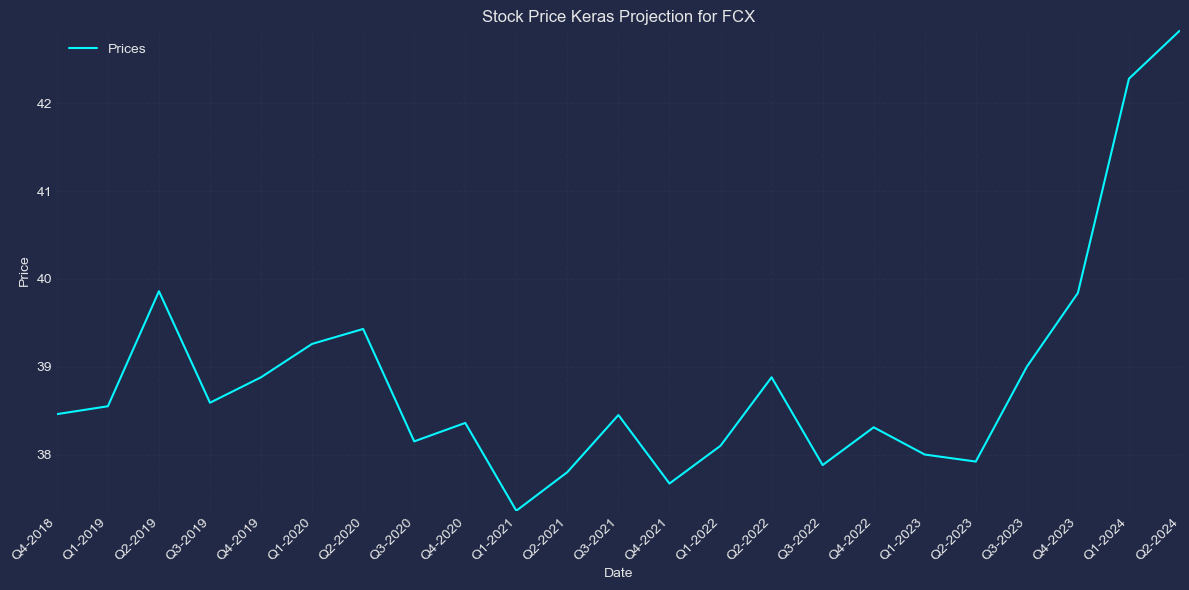

In [17]:
#Continue improving and formatting
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
import mplcyberpunk

plt.style.use("cyberpunk")

ticker = "WBA"

# Use an f-string to insert the value of 'ticker' into the file path
csv_path = f'F:\\inputs\\stocks\\{ticker}.csv'  # Note the 'f' before the string

# Load your CSV data
data = pd.read_csv(csv_path)

# Ensure your dataset has columns named 'Date' and 'Price'
# Convert the 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')  # Adjust the format as needed

# Extract the price column as a numpy array and remove non-numeric characters
prices = data['Close/Last'].values.astype(float)
print("Shape of 'prices':", prices.shape)

# Normalize the price data
scaler = MinMaxScaler()
prices = scaler.fit_transform(prices.reshape(-1, 1))

# Define a function to prepare the data for LSTM training
def prepare_data(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

# Set the number of previous days to look back
look_back = 30  # You can adjust this value

# Prepare the data
X, Y = prepare_data(prices, look_back)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Create and compile the LSTM model
model = Sequential()
model.add(LSTM(units=1, activation='relu', input_shape=(look_back, 1)))  # Adjust the input shape
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=1, batch_size=6, verbose=1)

# Make predictions on the test set
predicted = model.predict(X_test)

# Inverse transform the predictions to get actual price values
predicted = scaler.inverse_transform(predicted)
Y_test = scaler.inverse_transform(Y_test)

# Calculate RMSE (Root Mean Squared Error) to evaluate the model
rmse = sqrt(mean_squared_error(Y_test, predicted))
print("Root Mean Squared Error:", rmse)

# Define the start and end dates for the projection period
projection_start_date = '2023-12-15'  # Adjust to your desired start date
projection_end_date = '2024-06-30' 

# Generate a sequence of dates for the projection period
projection_dates = pd.date_range(start=projection_start_date, end=projection_end_date)

# Prepare the input data for projections
X_projection = X_test[-1:]  # Use the last available data point as the initial input

# Use the trained model to make projections
projected_prices = []
for _ in range(len(projection_dates)):
    projected_price = model.predict(X_projection)
    projected_prices.append(projected_price)
    # Update X_projection by removing the first element and adding the projected_price
    X_projection = np.concatenate((X_projection[:, 1:, :], projected_price.reshape(1, 1, 1)), axis=1)

# Inverse transform the projected prices to get actual price values
projected_prices = scaler.inverse_transform(np.array(projected_prices).reshape(-1, 1))

# Combine historical and projected data
combined_prices = np.concatenate((Y_test, projected_prices), axis=0)

# Ensure that the combined_prices array has the same length as projection_quarters
if len(combined_prices) < len(projection_quarters):
    missing_values = len(projection_quarters) - len(combined_prices)
    padding = [np.nan] * missing_values
    combined_prices = np.concatenate((combined_prices, padding))




def convert_to_quarters(date):
    quarter = (date.month - 1) // 3 + 1
    return f"Q{quarter}-{date.year}"


projection_quarters = [convert_to_quarters(date) for date in projection_dates]

data['Quarter'] = data['Date']

# Visualize the predictions vs. actual prices with quarters on the x-axis
quarters = data['Quarter'][train_size + look_back:].values



# Ensure that the length of quarters matches the combined length of historical and projected y-values
quarters = quarters[:len(combined_prices)]


# Ensure that x_positions and combined_prices have the same length
if len(x_positions) != len(combined_prices):
    min_length = min(len(x_positions), len(combined_prices))
    x_positions = x_positions[:min_length]
    combined_prices = combined_prices[:min_length]


# Pad the shorter array with NaN values
if len(quarters) < len(combined_prices):
    quarters = np.pad(quarters, (0, len(combined_prices) - len(quarters)), 'constant', constant_values=(np.nan,))

print("Length of quarters:", len(quarters))
print("Length of combined_prices:", len(combined_prices))
print("Quarters:", quarters[:10])  # Print the first 10 elements of quarters
print("Combined Prices:", combined_prices[:10])  # Print the first 10 elements of combined_prices
    
def generate_x_labels_positions(data, projection_start_date, projection_end_date, combined_prices):
    projection_dates = pd.date_range(start=projection_start_date, end=projection_end_date)
    all_dates = pd.date_range(start=data['Date'].min(), end=projection_end_date, freq='Q')  # Use 'Q' for quarterly frequency

    # Create x-axis labels in 'Q-YYYY' format for quarters
    x_labels = [f'Q{quarter}-{year}' for year, quarter in zip(all_dates.year, all_dates.quarter)]

    # Create x-axis positions
    x_positions = list(range(len(x_labels)))

    # Adjust the step size to control the number of labels displayed
    step = len(x_labels) // 60  # You can adjust this value as needed

    return x_labels, x_positions, step


# Call the function with the updated parameters
x_labels, x_positions, step = generate_x_labels_positions(data, projection_start_date, projection_end_date, combined_prices)


# Print the lengths of x_positions and combined_prices
print("Length of x_positions:", len(x_positions))
print("Length of combined_prices:", len(combined_prices))

# Check for any discrepancies in data
if len(x_positions) != len(combined_prices):
    print("Mismatch in data lengths!")

# Verify data types
print("Data type of x_positions:", type(x_positions))
print("Data type of combined_prices:", type(combined_prices))

# Visualize the predictions vs. actual prices with months on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(x_positions, combined_prices, label="Prices")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"Stock Price Keras Projection for {ticker}")

# Print the projection x-axis labels and positions
print("Projection X Labels:", x_labels[-len(projection_dates):])
print("Projection X Positions:", x_positions[-len(projection_dates):])

# Set the y-axis limits to ensure the series values are fully visible
plt.ylim(np.min(combined_prices), np.max(combined_prices))

# Calculate the total number of labels (historical + projection)
total_labels = len(x_labels)

# Calculate the step for labeling to evenly distribute labels
step = max(total_labels // 20, 1)  # Adjust the denominator as needed

# Calculate the maximum number of labels that can fit within the figure
max_labels = len(x_positions) // step

# Calculate the additional space needed for projection labels
extra_space = max_labels * step - total_labels

# Set the x-axis limits to include the projection period and extra space for labels
plt.xlim(x_positions[0] - extra_space, x_positions[-1] + extra_space)


# Set the x-axis ticks with both positions and labels
plt.xticks(x_positions[::step], x_labels[::step], rotation=45, ha='right')


plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

In [ ]:
#Continue improving and formatting
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
import mplcyberpunk

plt.style.use("cyberpunk")

ticker = "WMB"

# Use an f-string to insert the value of 'ticker' into the file path
csv_path = f'F:\\inputs\\stocks\\{ticker}.csv'  # Note the 'f' before the string

# Load your CSV data
data = pd.read_csv(csv_path)

# Ensure your dataset has columns named 'Date' and 'Price'
# Convert the 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')  # Adjust the format as needed

# Extract the price column as a numpy array and remove non-numeric characters
prices = data['Close/Last'].values.astype(float)
print("Shape of 'prices':", prices.shape)

# Normalize the price data
scaler = MinMaxScaler()
prices = scaler.fit_transform(prices.reshape(-1, 1))

# Define a function to prepare the data for LSTM training
def prepare_data(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

# Set the number of previous days to look back
look_back = 30  # You can adjust this value

# Prepare the data
X, Y = prepare_data(prices, look_back)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Create and compile the LSTM model
model = Sequential()
model.add(LSTM(units=1, activation='relu', input_shape=(look_back, 1)))  # Adjust the input shape
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=1, batch_size=6, verbose=1)

# Make predictions on the test set
predicted = model.predict(X_test)

# Inverse transform the predictions to get actual price values
predicted = scaler.inverse_transform(predicted)
Y_test = scaler.inverse_transform(Y_test)

# Calculate RMSE (Root Mean Squared Error) to evaluate the model
rmse = sqrt(mean_squared_error(Y_test, predicted))
print("Root Mean Squared Error:", rmse)

# Define the start and end dates for the projection period
projection_start_date = '2023-12-15'  # Adjust to your desired start date
projection_end_date = '2024-06-30' 

# Generate a sequence of dates for the projection period
projection_dates = pd.date_range(start=projection_start_date, end=projection_end_date)

# Prepare the input data for projections
X_projection = X_test[-1:]  # Use the last available data point as the initial input

# Use the trained model to make projections
projected_prices = []
for _ in range(len(projection_dates)):
    projected_price = model.predict(X_projection)
    projected_prices.append(projected_price)
    # Update X_projection by removing the first element and adding the projected_price
    X_projection = np.concatenate((X_projection[:, 1:, :], projected_price.reshape(1, 1, 1)), axis=1)

# Inverse transform the projected prices to get actual price values
projected_prices = scaler.inverse_transform(np.array(projected_prices).reshape(-1, 1))

# Combine historical and projected data
combined_prices = np.concatenate((Y_test, projected_prices), axis=0)

# Ensure that the combined_prices array has the same length as projection_quarters
if len(combined_prices) < len(projection_quarters):
    missing_values = len(projection_quarters) - len(combined_prices)
    padding = [np.nan] * missing_values
    combined_prices = np.concatenate((combined_prices, padding))




def convert_to_quarters(date):
    quarter = (date.month - 1) // 3 + 1
    return f"Q{quarter}-{date.year}"


projection_quarters = [convert_to_quarters(date) for date in projection_dates]

data['Quarter'] = data['Date']

# Visualize the predictions vs. actual prices with quarters on the x-axis
quarters = data['Quarter'][train_size + look_back:].values



# Ensure that the length of quarters matches the combined length of historical and projected y-values
quarters = quarters[:len(combined_prices)]


# Ensure that x_positions and combined_prices have the same length
if len(x_positions) != len(combined_prices):
    min_length = min(len(x_positions), len(combined_prices))
    x_positions = x_positions[:min_length]
    combined_prices = combined_prices[:min_length]


# Pad the shorter array with NaN values
if len(quarters) < len(combined_prices):
    quarters = np.pad(quarters, (0, len(combined_prices) - len(quarters)), 'constant', constant_values=(np.nan,))

print("Length of quarters:", len(quarters))
print("Length of combined_prices:", len(combined_prices))
print("Quarters:", quarters[:10])  # Print the first 10 elements of quarters
print("Combined Prices:", combined_prices[:10])  # Print the first 10 elements of combined_prices
    
def generate_x_labels_positions(data, projection_start_date, projection_end_date, combined_prices):
    projection_dates = pd.date_range(start=projection_start_date, end=projection_end_date)
    all_dates = pd.date_range(start=data['Date'].min(), end=projection_end_date, freq='Q')  # Use 'Q' for quarterly frequency

    # Create x-axis labels in 'Q-YYYY' format for quarters
    x_labels = [f'Q{quarter}-{year}' for year, quarter in zip(all_dates.year, all_dates.quarter)]

    # Create x-axis positions
    x_positions = list(range(len(x_labels)))

    # Adjust the step size to control the number of labels displayed
    step = len(x_labels) // 60  # You can adjust this value as needed

    return x_labels, x_positions, step


# Call the function with the updated parameters
x_labels, x_positions, step = generate_x_labels_positions(data, projection_start_date, projection_end_date, combined_prices)


# Print the lengths of x_positions and combined_prices
print("Length of x_positions:", len(x_positions))
print("Length of combined_prices:", len(combined_prices))

# Check for any discrepancies in data
if len(x_positions) != len(combined_prices):
    print("Mismatch in data lengths!")

# Verify data types
print("Data type of x_positions:", type(x_positions))
print("Data type of combined_prices:", type(combined_prices))

# Visualize the predictions vs. actual prices with months on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(x_positions, combined_prices, label="Prices")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"Stock Price Keras Projection for {ticker}")

# Print the projection x-axis labels and positions
print("Projection X Labels:", x_labels[-len(projection_dates):])
print("Projection X Positions:", x_positions[-len(projection_dates):])

# Set the y-axis limits to ensure the series values are fully visible
plt.ylim(np.min(combined_prices), np.max(combined_prices))

# Calculate the total number of labels (historical + projection)
total_labels = len(x_labels)

# Calculate the step for labeling to evenly distribute labels
step = max(total_labels // 60, 1)  # Adjust the denominator as needed

# Calculate the maximum number of labels that can fit within the figure
max_labels = len(x_positions) // step

# Calculate the additional space needed for projection labels
extra_space = max_labels * step - total_labels

# Set the x-axis limits to include the projection period and extra space for labels
plt.xlim(x_positions[0] - extra_space, x_positions[-1] + extra_space)


# Set the x-axis ticks with both positions and labels
plt.xticks(x_positions[::step], x_labels[::step], rotation=45, ha='right')


plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()